
# Assign 1 Recommender System
# Dataset: Amazon Reviews - Movies & TV Category



# Section 1
#  Import Libraries

In [28]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#  1.1.1 Load Dataset
# Load the Amazon Movies & TV reviews dataset from CSV file

In [ ]:
# === Load CSV ===
file_path = "C:/Users/Nour/Documents/VSCODE/IRS/AS1/amazon_movies/Movies_and_TV.csv"   
df = pd.read_csv(file_path)

# 1.1.2 Data Preprocessing & Overview
# Set proper column names and remove timestamp column (not needed for analysis)

In [ ]:
# === Set proper column headers and drop timestamp ===
df.columns = ['item', 'user', 'rating', 'timestamp']
df = df.drop('timestamp', axis=1)
print(" Headers set and timestamp column dropped")
print(f" New shape: {df.shape}")
print(f" Columns: {df.columns.tolist()}")

 Headers set and timestamp column dropped
 New shape: (8765567, 3)
 Columns: ['item', 'user', 'rating']


In [31]:
print(" Top 5 Rows:")
display(df.head())


 Top 5 Rows:


,item,user,rating
0,0001527665,A2VHSG6TZHU1OB,5.0
1,0001527665,A23EJWOW1TLENE,5.0
2,0001527665,A1KM9FNEJ8Q171,5.0
3,0001527665,A38LY2SSHVHRYB,4.0
4,0001527665,AHTYUW2H1276L,5.0


In [32]:
print("\n Shape (rows, columns):")
print(df.shape)



 Shape (rows, columns):
(8765567, 3)


In [33]:

print("\n Columns:")
print(df.columns.tolist())


 Columns:
['item', 'user', 'rating']


In [34]:

print("\n Data Types:")
print(df.dtypes)


 Data Types:
item       object
user       object
rating    float64
dtype: object


In [35]:

print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
item      0
user      0
rating    0
dtype: int64


In [36]:

print("\n Statistical Summary:")
display(df.describe(include='all'))



 Statistical Summary:


,item,user,rating
count,8765567,8765567,8.765567e+06
unique,182032,3826085,NaN
top,B00YSG2ZPA,AV6QDP8Q0ONK4,NaN
freq,24558,4254,NaN
mean,NaN,NaN,4.233010e+00
std,NaN,NaN,1.221438e+00
min,NaN,NaN,1.000000e+00
25%,NaN,NaN,4.000000e+00
50%,NaN,NaN,5.000000e+00
75%,NaN,NaN,5.000000e+00


In [37]:
print("\n Unique Values Per Column:")
print(df.nunique())


 Unique Values Per Column:
item       182032
user      3826085
rating          5
dtype: int64


# 1.1.3 Verify that the dataset meets minimum requirements:
# - Minimum 100,000 users
# - Minimum 1,000 items
# - Minimum 1,000,000 ratings


In [ ]:
print("=" * 60)
print("DATASET COMPLIANCE CHECK")
print("=" * 60)

# Minimum requirements
MIN_USERS = 100_000
MIN_ITEMS = 1_000
MIN_RATINGS = 1_000_000

# Get actual counts
num_users = df['user'].nunique()
num_items = df['item'].nunique()
num_ratings = len(df)

# Display results


print(f"\n Actual Dataset:")
print(f"   Users:   {num_users:,} unique users")
print(f"   Items:   {num_items:,} unique items")
print(f"   Ratings: {num_ratings:,} total ratings")


# Overall compliance
all_pass = (num_users >= MIN_USERS and num_items >= MIN_ITEMS and num_ratings >= MIN_RATINGS)
print(f"\n{'='*60}")
print(f"OVERALL: {' DATASET COMPLIES WITH ALL REQUIREMENTS' if all_pass else ' DATASET DOES NOT MEET REQUIREMENTS'}")
print(f"{'='*60}")

# 2. Rating scale verification
print(f"\n{'='*60}")
print("RATING SCALE VERIFICATION")
print("=" * 60)

min_rating = df['rating'].min()
max_rating = df['rating'].max()
unique_ratings = sorted(df['rating'].unique())

print(f"\n Rating Range:")
print(f"   Minimum: {min_rating}")
print(f"   Maximum: {max_rating}")
print(f"   Expected Range: 1.0 - 5.0")

print(f"\n Unique Rating Values:")
print(f"  {unique_ratings}")

DATASET COMPLIANCE CHECK

 Actual Dataset:
  • Users:   3,826,085 unique users
  • Items:   182,032 unique items
  • Ratings: 8,765,567 total ratings

OVERALL:  DATASET COMPLIES WITH ALL REQUIREMENTS

RATING SCALE VERIFICATION

 Rating Range:
  • Minimum: 1.0
  • Maximum: 5.0
  • Expected Range: 1.0 - 5.0

 Unique Rating Values:
  [1.0, 2.0, 3.0, 4.0, 5.0]


# 1.2 - check Rating scale: 1.0 to 5.0

In [ ]:
# Check if ratings are within 1-5 scale
valid_scale = (min_rating >= 1.0) and (max_rating <= 5.0)
print(f"\n Scale Validation:")
print(f"  {'Ratings are within 1-5 scale' if valid_scale else ' Ratings are outside 1-5 scale'}")

print(f"\n{'='*60}")


 Scale Validation:
  Ratings are within 1-5 scale



# 1.3 & 1.4
# Calculate the number of ratings per user (nu) and per item (ni)
# This helps understand user activity and item popularity

In [ ]:
print("=" * 60)
print("RATINGS DISTRIBUTION ANALYSIS")
print("=" * 60)

# 3. Calculate number of ratings for each user
nu = df.groupby('user')['rating'].count()
print(f"\n Ratings per User (nu):")
print(f"   Total users: {len(nu):,}")
print(f"   Min ratings per user: {nu.min()}")
print(f"   Max ratings per user: {nu.max()}")

# 4. Calculate number of ratings for each item
ni = df.groupby('item')['rating'].count()
print(f"\n Ratings per Item (ni):")
print(f"   Total items: {len(ni):,}")
print(f"   Min ratings per item: {ni.min()}")
print(f"   Max ratings per item: {ni.max()}")

print(f"\n{'='*60}")
print(" Variables saved: 'nu' (ratings per user), 'ni' (ratings per item)")
print(f"{'='*60}")

RATINGS DISTRIBUTION ANALYSIS

 Ratings per User (nu):
  • Total users: 3,826,085
  • Min ratings per user: 1
  • Max ratings per user: 4254

 Ratings per Item (ni):
  • Total items: 182,032
  • Min ratings per item: 1
  • Max ratings per item: 24558

 Variables saved: 'nu' (ratings per user), 'ni' (ratings per item)


In [41]:
nu

user
A00013803RVZPCZKTT9U    1
A0001392IVCRENBEIEYS    1
A0001598OL7FAN6XNMK9    3
A0002090WKEMAO8KOWKM    2
A00049826E18XJLZ3YC0    1
                       ..
AZZZOVIBXHGDR           1
AZZZQEK5E6KN            1
AZZZVKYVCQXEO           1
AZZZX50NWEFU            1
AZZZYAYJQSDOJ           1
Name: rating, Length: 3826085, dtype: int64

In [42]:
ni

item
0000143502     1
0000143529     1
0000143561     2
0000143588    12
0000695009     1
              ..
B01HJ1INB0    14
B01HJ3E0PQ     2
B01HJ6R77G     6
B01HJCCLOY     2
B01HJF79XO     1
Name: rating, Length: 182032, dtype: int64

# 1.5. & 1.6
# Calculate the average rating per user (ru) and per item (ri)

In [43]:
print("=" * 60)
print("AVERAGE RATINGS ANALYSIS")
print("=" * 60)

# 5. Calculate average rating for each user
ru = df.groupby('user')['rating'].mean()
print(f"\n Average Ratings per User (ru):")
print(f"   Total users: {len(ru):,}")
print(f"   Min average rating: {ru.min():.2f}")
print(f"   Max average rating: {ru.max():.2f}")
print(f"   Overall mean: {ru.mean():.2f}")

# 6. Calculate average rating for each item
ri = df.groupby('item')['rating'].mean()
print(f"\n Average Ratings per Item (ri):")
print(f"   Total items: {len(ri):,}")
print(f"   Min average rating: {ri.min():.2f}")
print(f"   Max average rating: {ri.max():.2f}")
print(f"   Overall mean: {ri.mean():.2f}")

print(f"\n{'='*60}")
print(" Variables saved: 'ru' (avg rating per user), 'ri' (avg rating per item)")
print(f"{'='*60}")

AVERAGE RATINGS ANALYSIS

 Average Ratings per User (ru):
   Total users: 3,826,085
   Min average rating: 1.00
   Max average rating: 5.00
   Overall mean: 4.24

 Average Ratings per Item (ri):
   Total items: 182,032
   Min average rating: 1.00
   Max average rating: 5.00
   Overall mean: 4.05

 Variables saved: 'ru' (avg rating per user), 'ri' (avg rating per item)


In [44]:
ru

user
A00013803RVZPCZKTT9U    1.000000
A0001392IVCRENBEIEYS    5.000000
A0001598OL7FAN6XNMK9    4.666667
A0002090WKEMAO8KOWKM    5.000000
A00049826E18XJLZ3YC0    5.000000
                          ...   
AZZZOVIBXHGDR           5.000000
AZZZQEK5E6KN            3.000000
AZZZVKYVCQXEO           5.000000
AZZZX50NWEFU            5.000000
AZZZYAYJQSDOJ           5.000000
Name: rating, Length: 3826085, dtype: float64

In [45]:
ri

item
0000143502    5.000000
0000143529    5.000000
0000143561    3.500000
0000143588    4.750000
0000695009    4.000000
                ...   
B01HJ1INB0    4.428571
B01HJ3E0PQ    1.000000
B01HJ6R77G    4.333333
B01HJCCLOY    2.000000
B01HJF79XO    5.000000
Name: rating, Length: 182032, dtype: float64

# 1.7.1
# Sort items by number of ratings and plot the distribution

RATINGS DISTRIBUTION PER ITEM (SORTED)

 Items sorted by number of ratings (ascending)
   Total items: 182,032

 Top 5 least rated items:
item
0000143502    1
B00143XE50    1
B00143XE4Q    1
B00143TM2O    1
B00142X56O    1
Name: rating, dtype: int64

 Top 5 most rated items:
item
B01BHTSIOC    20889
B00AQVMZKQ    21015
B000WGWQG8    23584
B00006CXSS    24489
B00YSG2ZPA    24558
Name: rating, dtype: int64


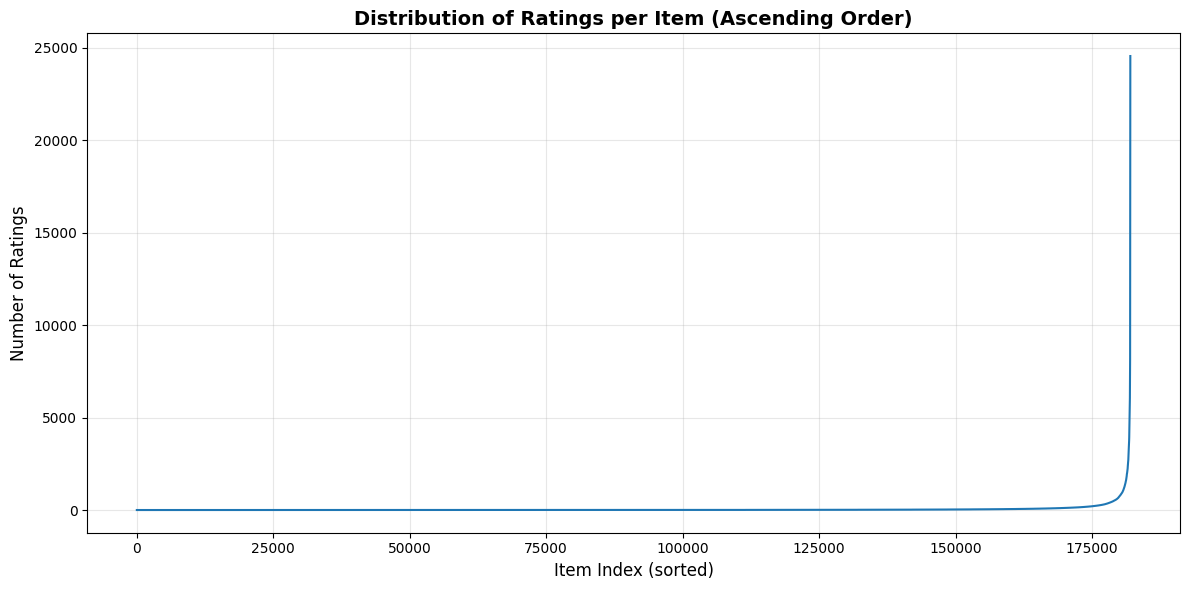

In [46]:
# === 7. Sort and Plot Ratings Distribution per Item ===

# Sort ratings per item in ascending order
ni_sorted = ni.sort_values(ascending=True)

print("=" * 60)
print("RATINGS DISTRIBUTION PER ITEM (SORTED)")
print("=" * 60)
print(f"\n Items sorted by number of ratings (ascending)")
print(f"   Total items: {len(ni_sorted):,}")
print(f"\n Top 5 least rated items:")
print(ni_sorted.head())
print(f"\n Top 5 most rated items:")
print(ni_sorted.tail())

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.plot(range(len(ni_sorted)), ni_sorted.values, linewidth=1.5)
plt.xlabel('Item Index (sorted)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Distribution of Ratings per Item (Ascending Order)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")

# optionalllll
# 1.7.2 Enhanced Visualization (Log Scale)
# Use logarithmic scale on x-axis for better visibility of the distribution pattern

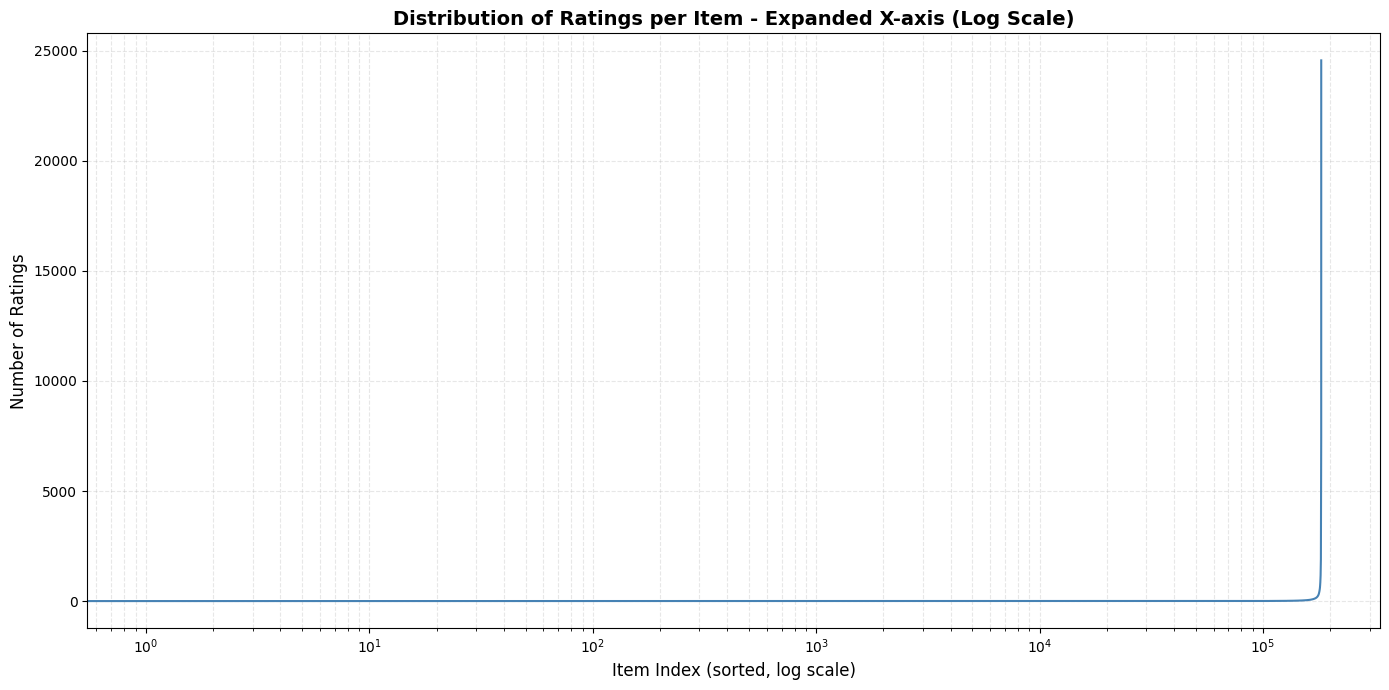

 Created expanded visualizations:
  Log scale plot for full distribution


In [47]:
# === Enhanced Visualization with Expanded Scale ===
plt.figure(figsize=(14, 7))
plt.plot(range(len(ni_sorted)), ni_sorted.values, linewidth=1.5, color='steelblue')
plt.xscale('log')  # Log scale on x-axis for better spread
plt.xlabel('Item Index (sorted, log scale)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Distribution of Ratings per Item - Expanded X-axis (Log Scale)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, which='both', linestyle='--')
plt.tight_layout()
plt.show()


print(f" Created expanded visualizations:")
print(f"  Log scale plot for full distribution")

# 1.8 Product Grouping by Average Rating 
# Group products into 10 categories (G1-G10) based on their position in the average rating :
# - **G1**: Products with average ratings in the bottom 1% (lowest rated)
# - **G2**: 1% < average rating ≤ 5%
# - **G3**: 5% < average rating ≤ 10%
# - **G4**: 10% < average rating ≤ 20%
# - **G5**: 20% < average rating ≤ 30%
# - **G6**: 30% < average rating ≤ 40%
# - **G7**: 40% < average rating ≤ 50%
# - **G8**: 50% < average rating ≤ 60%
# - **G9**: 60% < average rating ≤ 70%
# - **G10**: 70% < average rating ≤ 100% (highest rated)

PRODUCT GROUPING BY AVERAGE RATING PERCENTILES

G1 (≤1%):
   Rating range: 1.000 - 1.000
   Number of products: 5,932

G2 (1-5%):
   Rating range: 1.000 - 2.000
   Number of products: 5,464

G3 (5-10%):
   Rating range: 2.000 - 2.800
   Number of products: 7,052

G4 (10-20%):
   Rating range: 2.800 - 3.375
   Number of products: 18,103

G5 (20-30%):
   Rating range: 3.375 - 3.833
   Number of products: 18,091

G6 (30-40%):
   Rating range: 3.833 - 4.000
   Number of products: 20,676

G7 (40-50%):
   Rating range: 4.000 - 4.324
   Number of products: 15,699

G8 (50-60%):
   Rating range: 4.324 - 4.500
   Number of products: 19,890

G9 (60-70%):
   Rating range: 4.500 - 4.710
   Number of products: 16,517

G10 (70-100%):
   Rating range: 4.710 - 5.000
   Number of products: 54,608



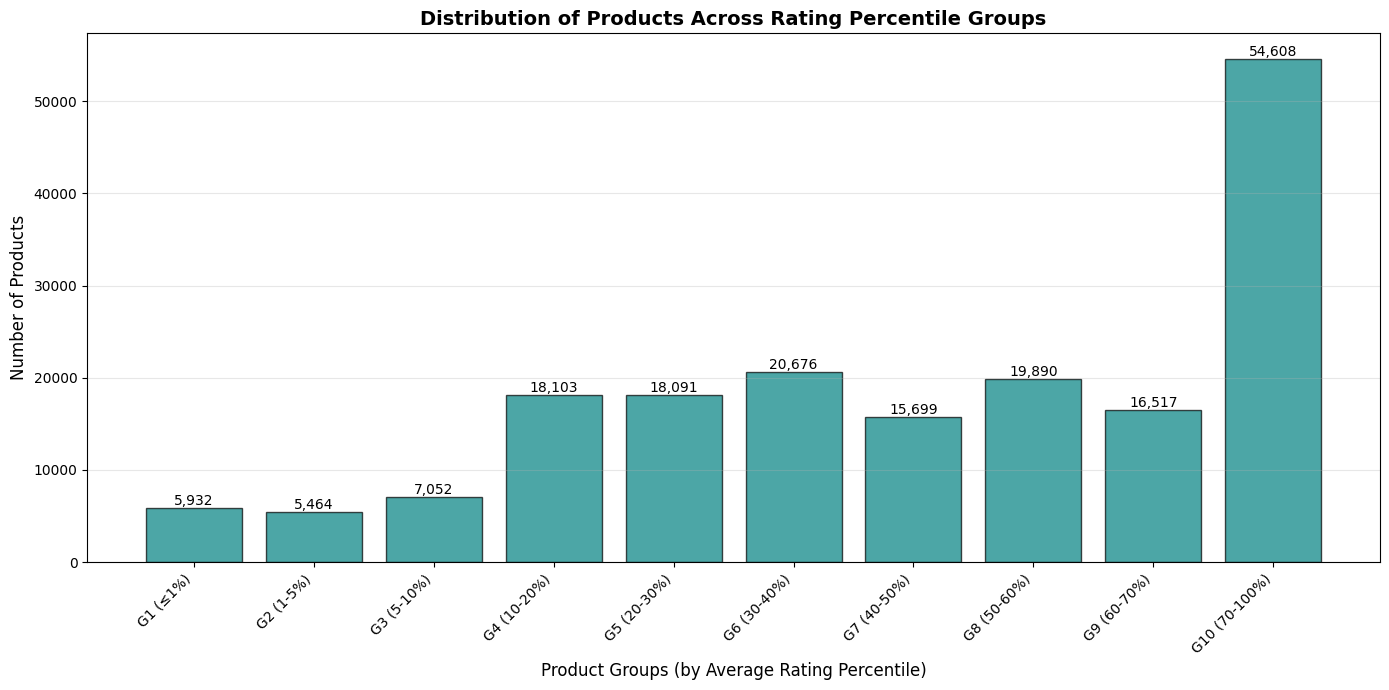


 Product grouping complete!
 Total products grouped: 182,032


In [48]:
# === Group Products by Average Rating Percentiles ===

print("=" * 60)
print("PRODUCT GROUPING BY AVERAGE RATING PERCENTILES")
print("=" * 60)

# Define percentile boundaries
percentiles = [0, 1, 5, 10, 20, 30, 40, 50, 60, 70, 100]
group_labels = ['G1 (≤1%)', 'G2 (1-5%)', 'G3 (5-10%)', 'G4 (10-20%)', 
                'G5 (20-30%)', 'G6 (30-40%)', 'G7 (40-50%)', 'G8 (50-60%)', 
                'G9 (60-70%)', 'G10 (70-100%)']

# Calculate percentile values for ri (average rating per item)
percentile_values = np.percentile(ri, percentiles)

# Group products based on percentiles
groups = {}
group_counts = []

for i in range(len(percentiles) - 1):
    lower_bound = percentile_values[i]
    upper_bound = percentile_values[i + 1]
    
    if i == 0:
        # First group: <= 1st percentile
        mask = ri <= upper_bound
    else:
        # Other groups: lower < ri <= upper
        mask = (ri > lower_bound) & (ri <= upper_bound)
    
    groups[group_labels[i]] = ri[mask]
    group_counts.append(len(groups[group_labels[i]]))
    
    print(f"\n{group_labels[i]}:")
    print(f"   Rating range: {lower_bound:.3f} - {upper_bound:.3f}")
    print(f"   Number of products: {len(groups[group_labels[i]]):,}")

print(f"\n{'='*60}")

# Plot the results
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(group_labels)), group_counts, color='teal', alpha=0.7, edgecolor='black')
plt.xlabel('Product Groups (by Average Rating Percentile)', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.title('Distribution of Products Across Rating Percentile Groups', fontsize=14, fontweight='bold')
plt.xticks(range(len(group_labels)), group_labels, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for i, (bar, count) in enumerate(zip(bars, group_counts)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\n Product grouping complete!")
print(f" Total products grouped: {sum(group_counts):,}")

# 1.9 Total Ratings per Group (Sorted)
# Calculate the total number of ratings for products in each group and sort in ascending order

In [49]:
# === Calculate Total Ratings per Group ===
print("=" * 60)
print("TOTAL RATINGS PER GROUP (ASCENDING ORDER)")
print("=" * 60)

# Calculate total ratings for each group
group_total_ratings = {}

for i, label in enumerate(group_labels):
    # Get items in this group
    items_in_group = groups[label].index
    # Sum up all ratings for these items (using ni which has count of ratings per item)
    total_ratings = ni[items_in_group].sum()
    group_total_ratings[label] = total_ratings

# Convert to DataFrame for easier sorting and display
ratings_summary = pd.DataFrame({
    'Group': list(group_total_ratings.keys()),
    'Number of Products': group_counts,
    'Total Ratings': list(group_total_ratings.values())
})

# Sort by total ratings in ascending order
ratings_summary_sorted = ratings_summary.sort_values('Total Ratings', ascending=True).reset_index(drop=True)

print("\n Total Ratings per Group (Sorted Ascending):\n")
print(ratings_summary_sorted.to_string(index=False))

# Calculate percentages
total_all_ratings = ratings_summary_sorted['Total Ratings'].sum()
ratings_summary_sorted['Percentage'] = (ratings_summary_sorted['Total Ratings'] / total_all_ratings * 100).round(2)

print(f"\n With Percentages:\n")
print(ratings_summary_sorted.to_string(index=False))

print(f"\n{'='*60}")
print(f"Total ratings across all groups: {total_all_ratings:,}")
print(f"{'='*60}")


TOTAL RATINGS PER GROUP (ASCENDING ORDER)

 Total Ratings per Group (Sorted Ascending):

        Group  Number of Products  Total Ratings
     G1 (≤1%)                5932           7270
    G2 (1-5%)                5464          39615
   G3 (5-10%)                7052         188669
  G4 (10-20%)               18103         471515
  G6 (30-40%)               20676         612827
  G5 (20-30%)               18091        1018215
G10 (70-100%)               54608        1332057
  G8 (50-60%)               19890        1365388
  G7 (40-50%)               15699        1579089
  G9 (60-70%)               16517        2150922

 With Percentages:

        Group  Number of Products  Total Ratings  Percentage
     G1 (≤1%)                5932           7270        0.08
    G2 (1-5%)                5464          39615        0.45
   G3 (5-10%)                7052         188669        2.15
  G4 (10-20%)               18103         471515        5.38
  G6 (30-40%)               20676         6128

In [50]:
# Save the sorted results
group_ratings_sorted = ratings_summary_sorted

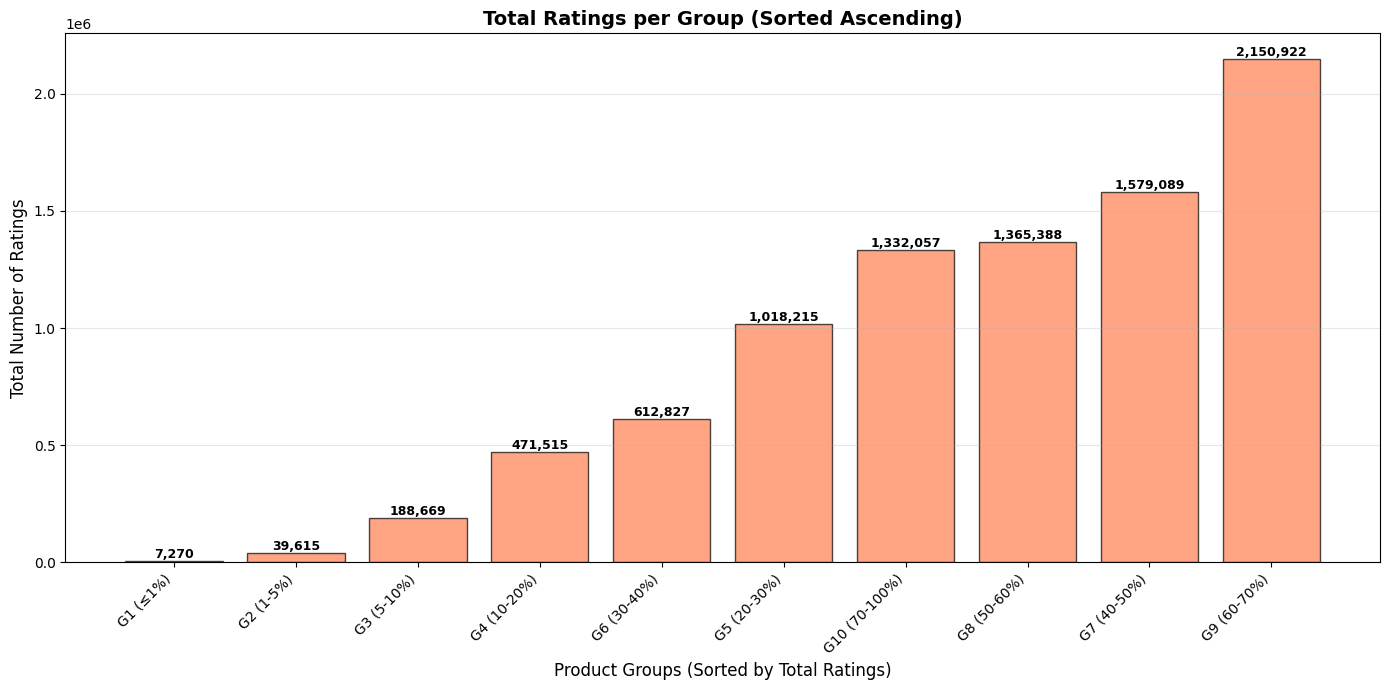


✓ Results saved in variable: 'group_ratings_sorted'


In [51]:
# Visualize the sorted results 
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(ratings_summary_sorted)), ratings_summary_sorted['Total Ratings'], 
               color='coral', alpha=0.7, edgecolor='black')
plt.xlabel('Product Groups (Sorted by Total Ratings)', fontsize=12)
plt.ylabel('Total Number of Ratings', fontsize=12)
plt.title('Total Ratings per Group (Sorted Ascending)', fontsize=14, fontweight='bold')
plt.xticks(range(len(ratings_summary_sorted)), ratings_summary_sorted['Group'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for i, (bar, rating) in enumerate(zip(bars, ratings_summary_sorted['Total Ratings'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{rating:,}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n✓ Results saved in variable: 'group_ratings_sorted'")

# 1.10 Distribution of Ratings per Group (Original Order)
# Visualize the total number of ratings in each group in their original percentile order (G1 → G10)

RATINGS DISTRIBUTION - ORIGINAL GROUP ORDER (G1-G10)

 Total Ratings per Group (Original Order G1-G10):

G1 (≤1%): 7,270 ratings
G2 (1-5%): 39,615 ratings
G3 (5-10%): 188,669 ratings
G4 (10-20%): 471,515 ratings
G5 (20-30%): 1,018,215 ratings
G6 (30-40%): 612,827 ratings
G7 (40-50%): 1,579,089 ratings
G8 (50-60%): 1,365,388 ratings
G9 (60-70%): 2,150,922 ratings
G10 (70-100%): 1,332,057 ratings


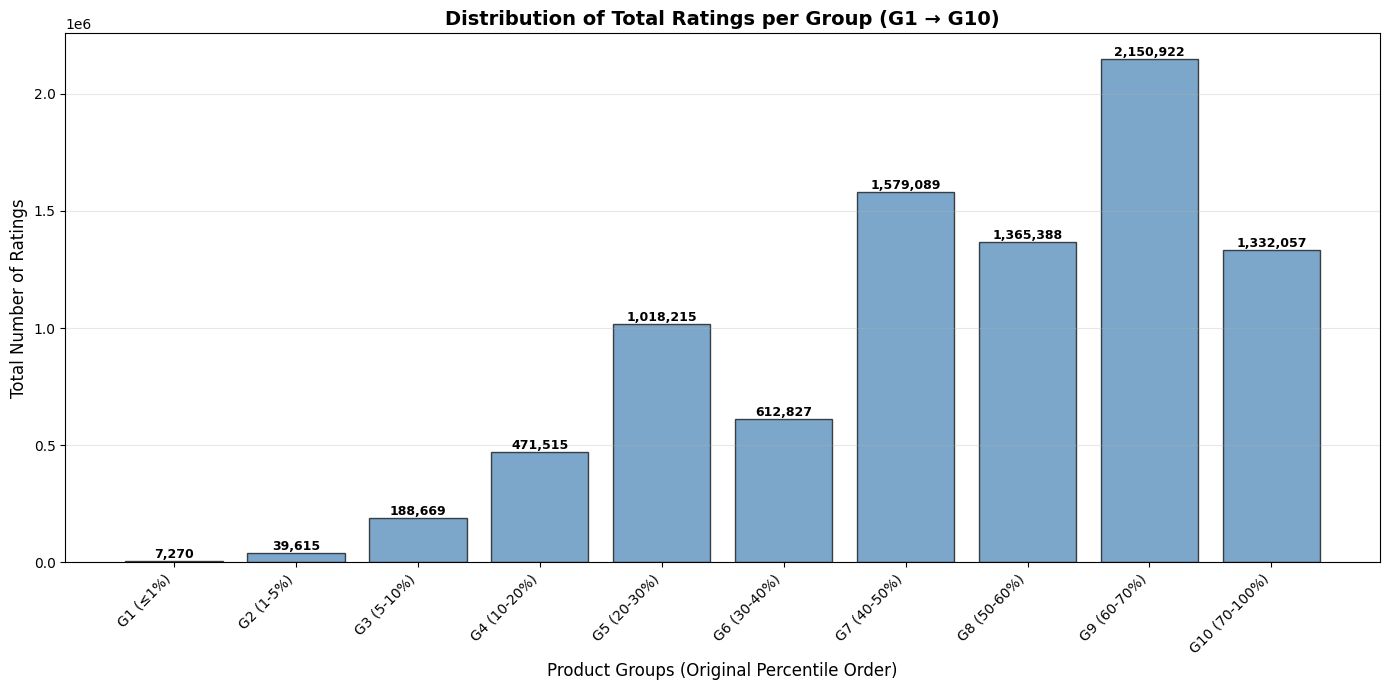


 Visualization shows ratings distribution from G1 (lowest rated) to G10 (highest rated)


In [52]:
# ===  Plot Ratings Distribution in Original Group Order ===
print("=" * 60)
print("RATINGS DISTRIBUTION - ORIGINAL GROUP ORDER (G1-G10)")
print("=" * 60)

# Use the original unsorted data
ratings_original_order = pd.DataFrame({
    'Group': list(group_total_ratings.keys()),
    'Total Ratings': list(group_total_ratings.values())
})

print("\n Total Ratings per Group (Original Order G1-G10):\n")
for idx, row in ratings_original_order.iterrows():
    print(f"{row['Group']}: {row['Total Ratings']:,} ratings")

# Plot in original order
plt.figure(figsize=(14, 7))
bars = plt.bar(range(len(ratings_original_order)), ratings_original_order['Total Ratings'], 
               color='steelblue', alpha=0.7, edgecolor='black')
plt.xlabel('Product Groups (Original Percentile Order)', fontsize=12)
plt.ylabel('Total Number of Ratings', fontsize=12)
plt.title('Distribution of Total Ratings per Group (G1 → G10)', fontsize=14, fontweight='bold')
plt.xticks(range(len(ratings_original_order)), ratings_original_order['Group'], rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for i, (bar, rating) in enumerate(zip(bars, ratings_original_order['Total Ratings'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{rating:,}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f" Visualization shows ratings distribution from G1 (lowest rated) to G10 (highest rated)")
print(f"{'='*60}")


# 1.11 Select Target Users by Rating Activity 
# Select 3 target users based on their position in the rating activity distribution:
# - **U1**: User with ≤ 2% rating activity (low activity user)
# - **U2**: User with > 2% and ≤ 5% rating activity (moderate activity user)
# - **U3**: User with > 5% and ≤ 10% rating activity (high activity user)

In [53]:
# === Select Target Users Based on Rating Activity ===
print("=" * 60)
print("TARGET USER SELECTION")
print("=" * 60)

# Calculate percentile values for nu (number of ratings per user)
percentile_2 = np.percentile(nu, 2)
percentile_5 = np.percentile(nu, 5)
percentile_10 = np.percentile(nu, 10)

print(f"\n Percentile Thresholds:")
print(f"   2nd percentile: {percentile_2:.2f} ratings")
print(f"   5th percentile: {percentile_5:.2f} ratings")
print(f"   10th percentile: {percentile_10:.2f} ratings")

# Select users in each category
# U1: <= 2% (low activity)
users_u1 = nu[nu <= percentile_2]
if len(users_u1) > 0:
    U1 = users_u1.sample(n=1, random_state=42).index[0]
    U1_ratings = nu[U1]
else:
    U1 = None
    U1_ratings = 0

# U2: > 2% and <= 5% (moderate activity)
users_u2 = nu[(nu > percentile_2) & (nu <= percentile_5)]
if len(users_u2) > 0:
    U2 = users_u2.sample(n=1, random_state=42).index[0]
    U2_ratings = nu[U2]
else:
    U2 = None
    U2_ratings = 0

# U3: > 5% and <= 10% (high activity)
users_u3 = nu[(nu > percentile_5) & (nu <= percentile_10)]
if len(users_u3) > 0:
    U3 = users_u3.sample(n=1, random_state=42).index[0]
    U3_ratings = nu[U3]
else:
    U3 = None
    U3_ratings = 0

print(f"\n Selected Target Users:")
print(f"\n  U1 (≤ 2% percentile):")
print(f"    User ID: {U1}")
print(f"    Number of ratings: {U1_ratings}")
print(f"    Percentile range: 0-2%")
print(f"    Users in this range: {len(users_u1):,}")

print(f"\n  U2 (2% < activity ≤ 5%):")
print(f"    User ID: {U2}")
print(f"    Number of ratings: {U2_ratings}")
print(f"    Percentile range: 2-5%")
print(f"    Users in this range: {len(users_u2):,}")

print(f"\n  U3 (5% < activity ≤ 10%):")
print(f"    User ID: {U3}")
print(f"    Number of ratings: {U3_ratings}")
print(f"    Percentile range: 5-10%")
print(f"    Users in this range: {len(users_u3):,}")



TARGET USER SELECTION

 Percentile Thresholds:
   2nd percentile: 1.00 ratings
   5th percentile: 1.00 ratings
   10th percentile: 1.00 ratings

 Selected Target Users:

  U1 (≤ 2% percentile):
    User ID: A189GQ65DL45CF
    Number of ratings: 1
    Percentile range: 0-2%
    Users in this range: 2,429,325

  U2 (2% < activity ≤ 5%):
    User ID: None
    Number of ratings: 0
    Percentile range: 2-5%
    Users in this range: 0

  U3 (5% < activity ≤ 10%):
    User ID: None
    Number of ratings: 0
    Percentile range: 5-10%
    Users in this range: 0


# Optionalllll

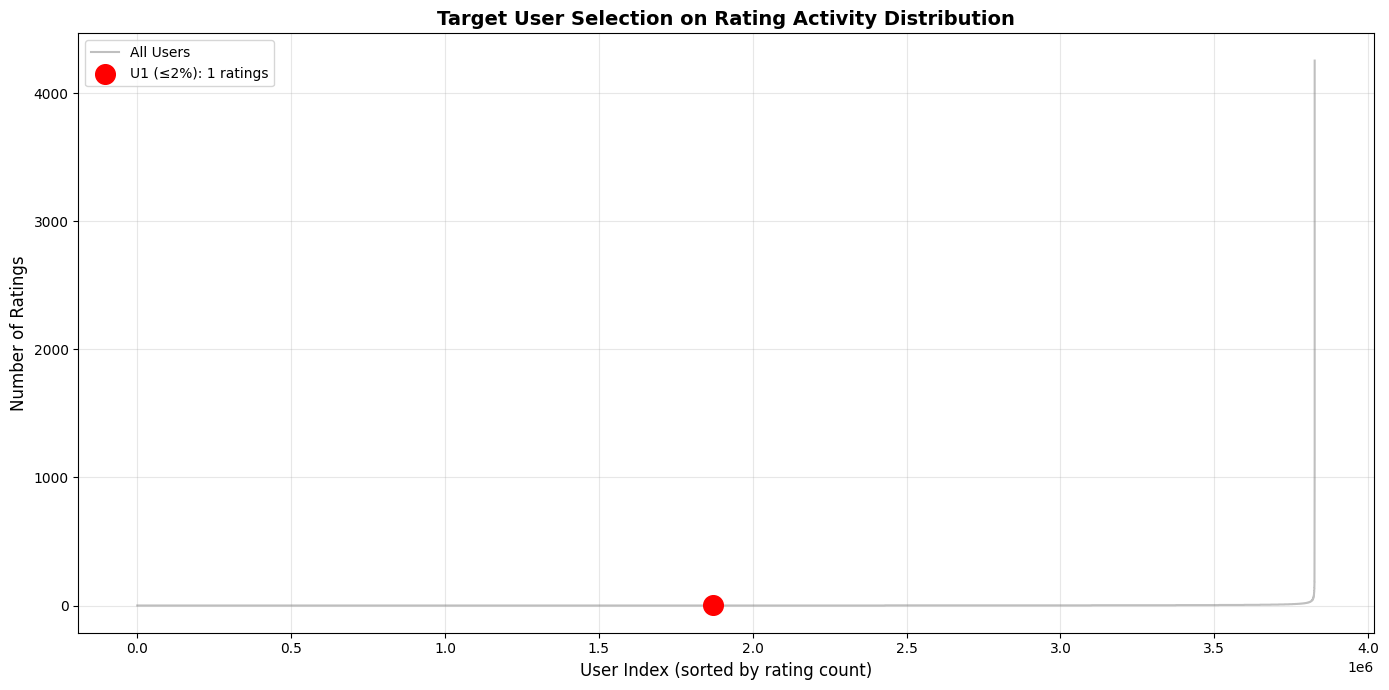


 Target users selected and saved in variables: U1, U2, U3


In [54]:
# Visualize the user selection
plt.figure(figsize=(14, 7))

# Plot the distribution of ratings per user (sorted)
nu_sorted = nu.sort_values(ascending=True)
plt.plot(range(len(nu_sorted)), nu_sorted.values, linewidth=1.5, color='gray', alpha=0.5, label='All Users')

# Mark the selected users
if U1:
    u1_position = nu_sorted.index.get_loc(U1)
    plt.scatter(u1_position, U1_ratings, color='red', s=200, zorder=5, label=f'U1 (≤2%): {U1_ratings} ratings', marker='o')

if U2:
    u2_position = nu_sorted.index.get_loc(U2)
    plt.scatter(u2_position, U2_ratings, color='orange', s=200, zorder=5, label=f'U2 (2-5%): {U2_ratings} ratings', marker='s')

if U3:
    u3_position = nu_sorted.index.get_loc(U3)
    plt.scatter(u3_position, U3_ratings, color='green', s=200, zorder=5, label=f'U3 (5-10%): {U3_ratings} ratings', marker='^')

plt.xlabel('User Index (sorted by rating count)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Target User Selection on Rating Activity Distribution', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f" Target users selected and saved in variables: U1, U2, U3")
print(f"{'='*60}")

# Optionallllll
# 11.1 Diagnostic: Check Percentile Distribution
# Investigate the percentile values to understand the user rating distribution

In [55]:
# ===  Diagnostic Check ===
print("=" * 60)
print("DIAGNOSTIC: USER RATING DISTRIBUTION")
print("=" * 60)

# Check multiple percentiles to see the distribution
percentiles_to_check = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 90, 95, 99]
print("\n Percentile Values for User Rating Counts:")
for p in percentiles_to_check:
    val = np.percentile(nu, p)
    print(f"  {p:3d}th percentile: {val:.2f} ratings")

# Check the actual distribution
print(f"\n User Rating Statistics:")
print(f"   Min ratings: {nu.min()}")
print(f"   Max ratings: {nu.max()}")
print(f"   Mean ratings: {nu.mean():.2f}")
print(f"   Median ratings: {nu.median():.2f}")

# Count users at different rating levels
print(f"\n User Distribution by Rating Count:")
rating_bins = [1, 2, 3, 4, 5, 10, 20, 50, 100, 500, 1000, nu.max()]
for i in range(len(rating_bins)-1):
    count = len(nu[(nu >= rating_bins[i]) & (nu < rating_bins[i+1])])
    print(f"   {rating_bins[i]:4d} - {rating_bins[i+1]:4d} ratings: {count:,} users")

# Check if percentile values are the same (which would cause empty ranges)
print(f"\n Checking Percentile Boundaries:")
print(f"   2nd percentile: {percentile_2:.2f}")
print(f"   5th percentile: {percentile_5:.2f}")
print(f"   10th percentile: {percentile_10:.2f}")

if percentile_2 == percentile_5:
    print(f"   WARNING: 2nd and 5th percentiles are the same! This means U2 range is empty.")
if percentile_5 == percentile_10:
    print(f"   WARNING: 5th and 10th percentiles are the same! This means U3 range is empty.")

# Count users in each intended range
count_u1 = len(nu[nu <= percentile_2])
count_u2 = len(nu[(nu > percentile_2) & (nu <= percentile_5)])
count_u3 = len(nu[(nu > percentile_5) & (nu <= percentile_10)])

print(f"\n Users in Each Target Range:")
print(f"   U1 range (≤ 2%): {count_u1:,} users")
print(f"   U2 range (2-5%): {count_u2:,} users")
print(f"   U3 range (5-10%): {count_u3:,} users")

print(f"\n{'='*60}")

DIAGNOSTIC: USER RATING DISTRIBUTION

 Percentile Values for User Rating Counts:
    1th percentile: 1.00 ratings
    2th percentile: 1.00 ratings
    3th percentile: 1.00 ratings
    4th percentile: 1.00 ratings
    5th percentile: 1.00 ratings
    6th percentile: 1.00 ratings
    7th percentile: 1.00 ratings
    8th percentile: 1.00 ratings
    9th percentile: 1.00 ratings
   10th percentile: 1.00 ratings
   15th percentile: 1.00 ratings
   20th percentile: 1.00 ratings
   25th percentile: 1.00 ratings
   50th percentile: 1.00 ratings
   75th percentile: 2.00 ratings
   90th percentile: 4.00 ratings
   95th percentile: 6.00 ratings
   99th percentile: 17.00 ratings

 User Rating Statistics:
   Min ratings: 1
   Max ratings: 4254
   Mean ratings: 2.29
   Median ratings: 1.00

 User Distribution by Rating Count:
      1 -    2 ratings: 2,429,325 users
      2 -    3 ratings: 671,397 users
      3 -    4 ratings: 274,606 users
      4 -    5 ratings: 139,536 users
      5 -   10 ratings

# importanttttt
# comment on previous cell : user 2 and 3 failed to be selected  because there are
# no users in the dataset with 2-5% and 5-10% of ratings

# 1.12 Select Target Items
# Select the two lowest rated items as target items (i1 and i2)

In [56]:
# === Select Two Lowest Rated Items ===
print("=" * 60)
print("TARGET ITEM SELECTION")
print("=" * 60)

# Sort items by average rating (ascending) to find lowest rated
ri_sorted_asc = ri.sort_values(ascending=True)

# Select the two lowest rated items
i1 = ri_sorted_asc.index[0]
i2 = ri_sorted_asc.index[1]

# Get their ratings and statistics
i1_avg_rating = ri[i1]
i2_avg_rating = ri[i2]
i1_num_ratings = ni[i1]
i2_num_ratings = ni[i2]

print(f"\n Selected Target Items (Lowest Rated):")
print(f"\n  i1 (Lowest Rated Item):")
print(f"     Item ID: {i1}")
print(f"     Average rating: {i1_avg_rating:.2f}")
print(f"     Number of ratings: {i1_num_ratings}")

print(f"\n  i2 (Second Lowest Rated Item):")
print(f"     Item ID: {i2}")
print(f"     Average rating: {i2_avg_rating:.2f}")
print(f"     Number of ratings: {i2_num_ratings}")

# Show context: top 10 lowest rated items
print(f"\n Top 10 Lowest Rated Items for Context:")
print(f"\n{'Item ID':<20} {'Avg Rating':<12} {'Num Ratings'}")
print("-" * 50)
for idx, item_id in enumerate(ri_sorted_asc.head(10).index):
    avg_rat = ri[item_id]
    num_rat = ni[item_id]
    marker = ""
    if item_id == i1:
        marker = " ← i1 (selected)"
    elif item_id == i2:
        marker = " ← i2 (selected)"
    print(f"{item_id:<20} {avg_rat:<12.2f} {num_rat}{marker}")


print(f"\n{'='*60}")
print(f" Target items selected and saved in variables: i1, i2")
print(f"{'='*60}")

TARGET ITEM SELECTION

 Selected Target Items (Lowest Rated):

  i1 (Lowest Rated Item):
     Item ID: B001D839XI
     Average rating: 1.00
     Number of ratings: 1

  i2 (Second Lowest Rated Item):
     Item ID: B0020MMSFQ
     Average rating: 1.00
     Number of ratings: 1

 Top 10 Lowest Rated Items for Context:

Item ID              Avg Rating   Num Ratings
--------------------------------------------------
B001D839XI           1.00         1 ← i1 (selected)
B0020MMSFQ           1.00         1 ← i2 (selected)
B00004RY9Z           1.00         2
B0020GUWPA           1.00         1
B000F3AIM2           1.00         1
B000F2NB68           1.00         2
B000X9LQY2           1.00         1
B00511DI8O           1.00         1
B00ID6PSIC           1.00         5
B000F1SWNQ           1.00         1

 Target items selected and saved in variables: i1, i2


# optionallllll

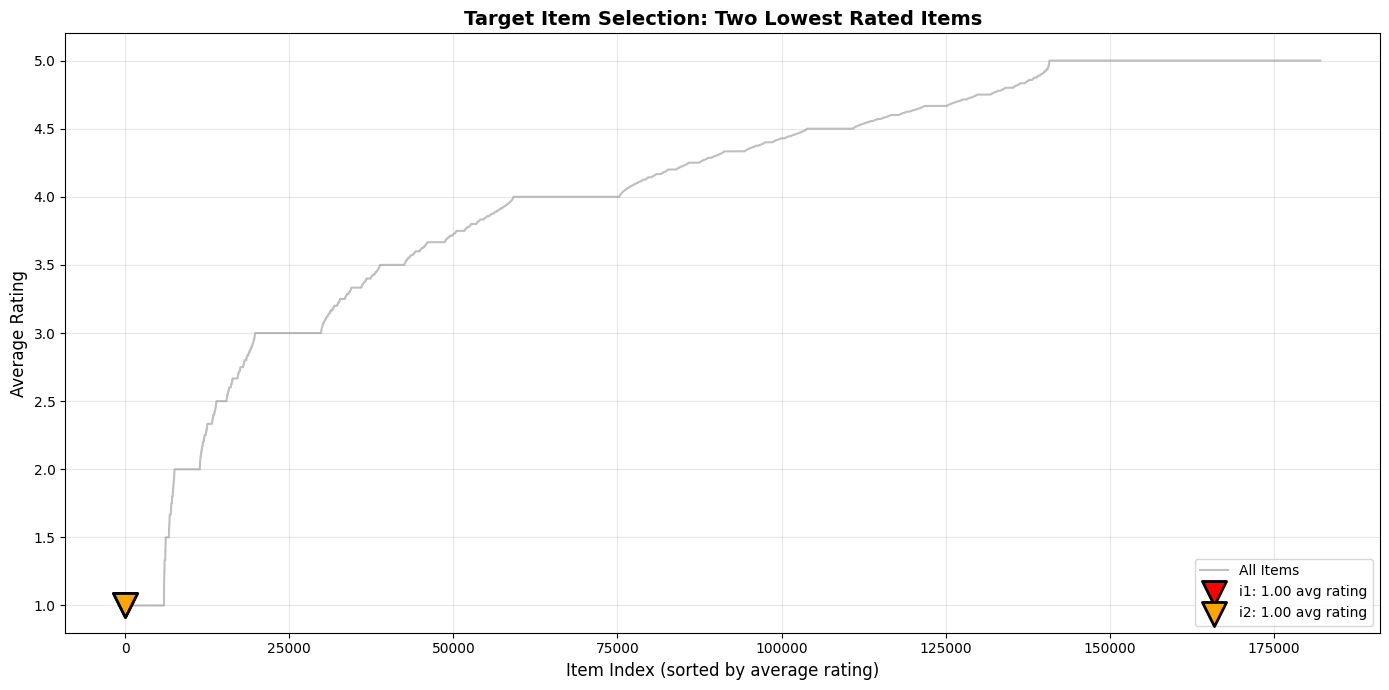

In [57]:
# Visualize the selected items on the rating distribution
plt.figure(figsize=(14, 7))

# Plot all items' average ratings (sorted)
plt.plot(range(len(ri_sorted_asc)), ri_sorted_asc.values, linewidth=1.5, color='gray', alpha=0.5, label='All Items')

# Mark the selected items
i1_position = 0  # First item in sorted list
i2_position = 1  # Second item in sorted list

plt.scatter(i1_position, i1_avg_rating, color='red', s=300, zorder=5, 
            label=f'i1: {i1_avg_rating:.2f} avg rating', marker='v', edgecolors='black', linewidths=2)
plt.scatter(i2_position, i2_avg_rating, color='orange', s=300, zorder=5, 
            label=f'i2: {i2_avg_rating:.2f} avg rating', marker='v', edgecolors='black', linewidths=2)

plt.xlabel('Item Index (sorted by average rating)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Target Item Selection: Two Lowest Rated Items', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [58]:
i1

'B001D839XI'

In [59]:
i2

'B0020MMSFQ'

# 1.13 
# Calculate co-rating relationships:
# - **No_common_users**: Number of users who rated the same items as each target user
# - **No_coRated_items**: Number of items that were rated by the same users as each target item


CO-RATING ANALYSIS

 Target User Item Sets:
   U1 rated 1 items
   U2 rated 0 items
   U3 rated 0 items

 Target Item User Sets:
   i1 was rated by 1 users
   i2 was rated by 1 users

CALCULATING CO-RATING USERS (No_common_users)

U1:
  • Number of co-rating users: 53

U2:
  • Number of co-rating users: 0

U3:
  • Number of co-rating users: 0

CALCULATING CO-RATED ITEMS (No_coRated_items)

i1:
  • Number of co-rated items: 1

i2:
  • Number of co-rated items: 0

SUMMARY

 Co-Rating Users (No_common_users):
   U1: 53 users
   U2: 0 users
   U3: 0 users

 Co-Rated Items (No_coRated_items):
   i1: 1 items
   i2: 0 items


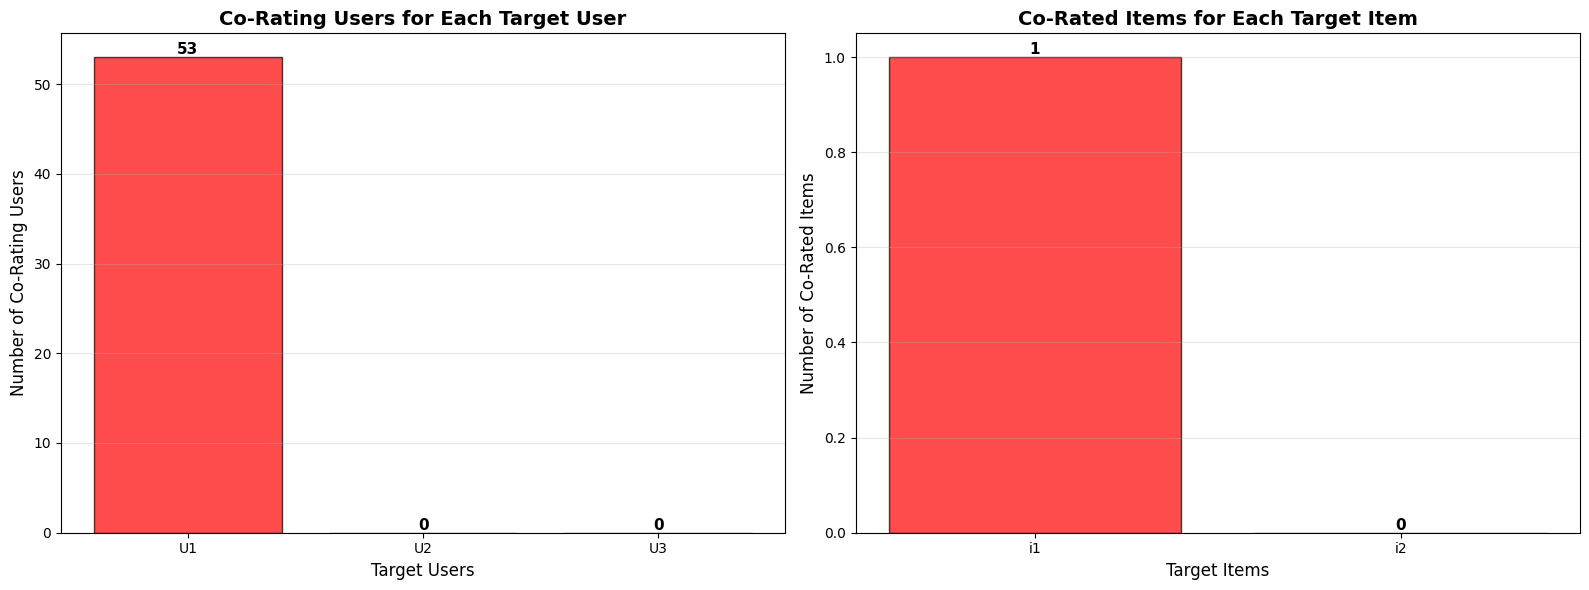


 Co-rating analysis complete!
 Results saved in dictionaries: No_common_users, No_coRated_items


In [ ]:
# === Calculate Co-Rating Users and Co-Rated Items ===
print("=" * 60)
print("CO-RATING ANALYSIS")
print("=" * 60)

# Get the items rated by each target user
U1_items = set(df[df['user'] == U1]['item'])
U2_items = set(df[df['user'] == U2]['item'])
U3_items = set(df[df['user'] == U3]['item'])

# Get the users who rated each target item
i1_users = set(df[df['item'] == i1]['user'])
i2_users = set(df[df['item'] == i2]['user'])

print(f"\n Target User Item Sets:")
print(f"   U1 rated {len(U1_items)} items")
print(f"   U2 rated {len(U2_items)} items")
print(f"   U3 rated {len(U3_items)} items")

print(f"\n Target Item User Sets:")
print(f"   i1 was rated by {len(i1_users)} users")
print(f"   i2 was rated by {len(i2_users)} users")

# Calculate No_common_users for each target user
# For each target user, count how many other users have rated at least one common item
print(f"\n{'='*60}")
print("CALCULATING CO-RATING USERS (No_common_users)")
print("=" * 60)

No_common_users = {}

for target_user, target_items in [('U1', U1_items), ('U2', U2_items), ('U3', U3_items)]:
    # Get all users who rated at least one of the target user's items
    users_who_rated_common_items = set()
    
    for item in target_items:
        # Get all users who rated this item
        users_for_item = set(df[df['item'] == item]['user'])
        users_who_rated_common_items.update(users_for_item)
    
    # Remove the target user themselves
    if target_user == 'U1':
        users_who_rated_common_items.discard(U1)
    elif target_user == 'U2':
        users_who_rated_common_items.discard(U2)
    elif target_user == 'U3':
        users_who_rated_common_items.discard(U3)
    
    No_common_users[target_user] = len(users_who_rated_common_items)
    
    print(f"\n{target_user}:")
    print(f"   Number of co-rating users: {No_common_users[target_user]:,}")

# Calculate No_coRated_items for each target item
# For each target item, count how many other items were rated by at least one common user
print(f"\n{'='*60}")
print("CALCULATING CO-RATED ITEMS (No_coRated_items)")
print("=" * 60)

No_coRated_items = {}

for target_item, target_users in [('i1', i1_users), ('i2', i2_users)]:
    # Get all items rated by at least one of the target item's users
    items_rated_by_common_users = set()
    
    for user in target_users:
        # Get all items rated by this user
        items_for_user = set(df[df['user'] == user]['item'])
        items_rated_by_common_users.update(items_for_user)
    
    # Remove the target item itself
    if target_item == 'i1':
        items_rated_by_common_users.discard(i1)
    elif target_item == 'i2':
        items_rated_by_common_users.discard(i2)
    
    No_coRated_items[target_item] = len(items_rated_by_common_users)
    
    print(f"\n{target_item}:")
    print(f"  • Number of co-rated items: {No_coRated_items[target_item]:,}")

# Summary visualization
print(f"\n{'='*60}")
print("SUMMARY")
print("=" * 60)

print(f"\n Co-Rating Users (No_common_users):")
for user in ['U1', 'U2', 'U3']:
    print(f"   {user}: {No_common_users[user]:,} users")

print(f"\n Co-Rated Items (No_coRated_items):")
for item in ['i1', 'i2']:
    print(f"   {item}: {No_coRated_items[item]:,} items")

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Co-rating users for target users
users_list = ['U1', 'U2', 'U3']
users_counts = [No_common_users[u] for u in users_list]
colors_users = ['red', 'orange', 'green']

bars1 = ax1.bar(users_list, users_counts, color=colors_users, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Target Users', fontsize=12)
ax1.set_ylabel('Number of Co-Rating Users', fontsize=12)
ax1.set_title('Co-Rating Users for Each Target User', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, count in zip(bars1, users_counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Co-rated items for target items
items_list = ['i1', 'i2']
items_counts = [No_coRated_items[i] for i in items_list]
colors_items = ['red', 'orange']

bars2 = ax2.bar(items_list, items_counts, color=colors_items, alpha=0.7, edgecolor='black')
ax2.set_xlabel('Target Items', fontsize=12)
ax2.set_ylabel('Number of Co-Rated Items', fontsize=12)
ax2.set_title('Co-Rated Items for Each Target Item', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, count in zip(bars2, items_counts):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f" Co-rating analysis complete!")
print(f" Results saved in dictionaries: No_common_users, No_coRated_items")
print(f"{'='*60}")

In [61]:
No_common_users

{'U1': 53, 'U2': 0, 'U3': 0}

In [62]:


No_coRated_items 

{'i1': 1, 'i2': 0}

# 1.14 
# Calculate the maximum number of users who have co-rated at least 30% of items with each target user
# - **Beta (β)**: Threshold representing users with significant overlap in rated items
# - **30% overlap**: Users who have rated at least 30% of the same items as the target user


In [65]:
# === Calculate Threshold Beta (30% Co-Rating Overlap) ===
print("=" * 60)
print("THRESHOLD BETA CALCULATION")
print("=" * 60)

# Define the overlap threshold
OVERLAP_THRESHOLD = 0.30

# Get items rated by each target user
U1_items = set(df[df['user'] == U1]['item'])
U2_items = set(df[df['user'] == U2]['item']) if U2 else set()
U3_items = set(df[df['user'] == U3]['item']) if U3 else set()

print(f"\n Target User Item Counts:")
print(f"   U1 rated {len(U1_items)} items")
if U2:
    print(f"   U2 rated {len(U2_items)} items")
else:
    print(f"   U2: No user selected (None)")
if U3:
    print(f"   U3 rated {len(U3_items)} items")
else:
    print(f"   U3: No user selected (None)")

# Calculate beta for each target user
beta_values = {}
users_above_threshold = {}

# OPTIMIZATION: Pre-compute user-item mapping (do this ONCE instead of millions of times)
print(f"\n Pre-computing user-item mappings ")
user_items_dict = df.groupby('user')['item'].apply(set).to_dict()
print(f" Pre-computation complete! {len(user_items_dict):,} users processed")

for target_user_name, target_user_id, target_items in [
    ('U1', U1, U1_items),
    ('U2', U2, U2_items),
    ('U3', U3, U3_items)
]:
    if target_user_id is None or len(target_items) == 0:
        beta_values[target_user_name] = 0
        users_above_threshold[target_user_name] = []
        print(f"\n{target_user_name}: Skipped (no user selected)")
        continue
    
    print(f"\ Processing {target_user_name}")
    
    # Count users who have rated at least 30% of target user's items
    users_meeting_threshold = []
    overlap_counts = []
    
    # Iterate through all users (much faster with pre-computed dict)
    for other_user, other_user_items in user_items_dict.items():
        # Skip the target user themselves
        if other_user == target_user_id:
            continue
        
        # Calculate overlap
        common_items = target_items.intersection(other_user_items)
        overlap_ratio = len(common_items) / len(target_items)
        
        # Check if meets threshold
        if overlap_ratio >= OVERLAP_THRESHOLD:
            users_meeting_threshold.append(other_user)
            overlap_counts.append(len(common_items))
    
    # Beta is the count of users meeting the threshold
    beta = len(users_meeting_threshold)
    beta_values[target_user_name] = beta
    users_above_threshold[target_user_name] = users_meeting_threshold
    
    print(f" {target_user_name} complete!")
    print(f"   Total items rated: {len(target_items)}")
    print(f"   Minimum overlap required (30%): {int(len(target_items) * OVERLAP_THRESHOLD)} items")
    print(f"   Users meeting threshold: {beta:,}")
    print(f"   Beta (β): {beta:,}")
    
    if beta > 0:
        print(f"  • Average overlap for qualifying users: {sum(overlap_counts)/len(overlap_counts):.1f} items")
        print(f"  • Max overlap: {max(overlap_counts)} items")
        print(f"  • Min overlap: {min(overlap_counts)} items")

# Summary
print(f"\n{'='*60}")
print("BETA THRESHOLD SUMMARY")
print("=" * 60)

print(f"\n Beta Values (users with ≥30% overlap):")
for user in ['U1', 'U2', 'U3']:
    print(f"   {user}: β = {beta_values[user]:,}")



print(f"\n{'='*60}")
print(f" Beta threshold calculation complete!")
print(f" Results saved in dictionary: beta_values")
print(f"{'='*60}")

THRESHOLD BETA CALCULATION

 Target User Item Counts:
   U1 rated 1 items
   U2: No user selected (None)
   U3: No user selected (None)

 Pre-computing user-item mappings 
 Pre-computation complete! 3,826,085 users processed
\ Processing U1
 U1 complete!
   Total items rated: 1
   Minimum overlap required (30%): 0 items
   Users meeting threshold: 53
   Beta (β): 53
  • Average overlap for qualifying users: 1.0 items
  • Max overlap: 1 items
  • Min overlap: 1 items

U2: Skipped (no user selected)

U3: Skipped (no user selected)

BETA THRESHOLD SUMMARY

 Beta Values (users with ≥30% overlap):
   U1: β = 53
   U2: β = 0
   U3: β = 0

 Beta threshold calculation complete!
 Results saved in dictionary: beta_values


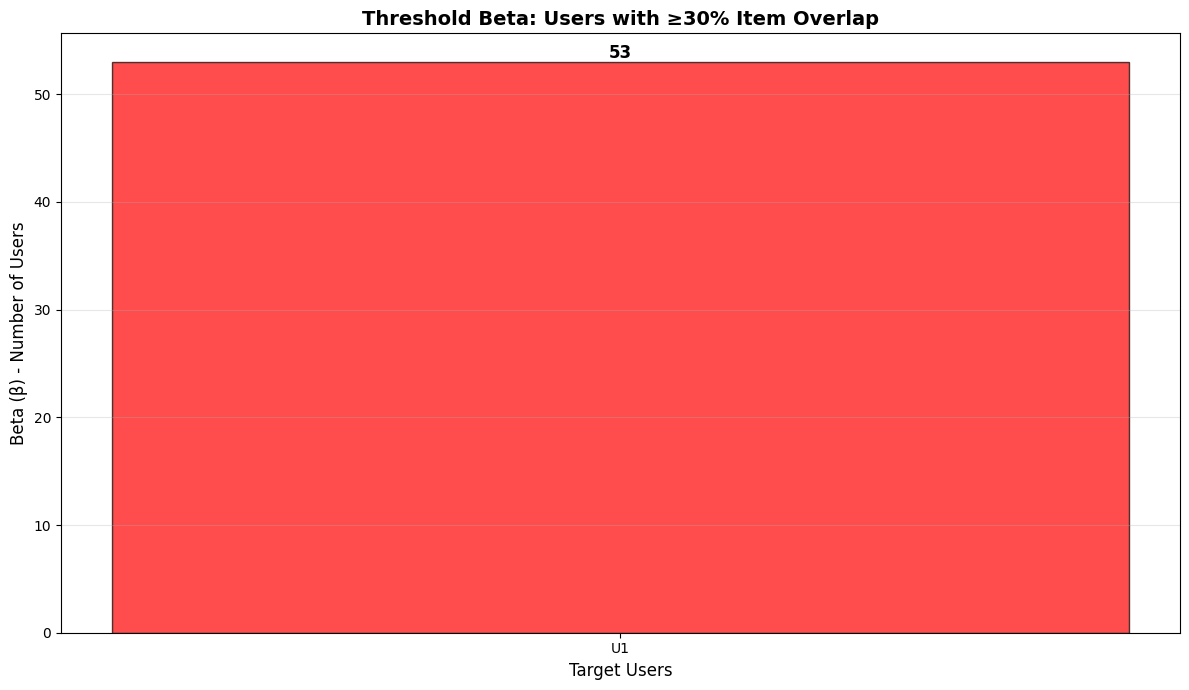

In [64]:
# Visualize beta values
fig, ax = plt.subplots(figsize=(12, 7))

# Only plot users that have beta values > 0 or are valid
valid_users = []
valid_betas = []
valid_colors = []
color_map = {'U1': 'red', 'U2': 'orange', 'U3': 'green'}

for user in ['U1', 'U2', 'U3']:
    if user == 'U1' or (user == 'U2' and U2) or (user == 'U3' and U3):
        valid_users.append(user)
        valid_betas.append(beta_values[user])
        valid_colors.append(color_map[user])

bars = ax.bar(valid_users, valid_betas, color=valid_colors, alpha=0.7, edgecolor='black')
ax.set_xlabel('Target Users', fontsize=12)
ax.set_ylabel('Beta (β) - Number of Users', fontsize=12)
ax.set_title(f'Threshold Beta: Users with ≥{int(OVERLAP_THRESHOLD*100)}% Item Overlap', 
             fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on top of bars
for bar, beta in zip(bars, valid_betas):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{beta:,}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# 1.16 in the report isA , rabna ykrem